In [1]:
import glob
import pandas as pd
import nibabel as nb
import numpy as np
from nistats.second_level_model import SecondLevelModel

/data/softwares/anaconda3/2019.10/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
networks = ['CER','LIM','MOT','VIS','DMN','FP','VATT_SAL']

nets_rmaps = {}

for net in networks:
    connectivity_maps = glob.glob("../rest/rmap_seeds/*sub*_"+net+".nii.gz")
    rmap_list = []
    for rmap in connectivity_maps:
        rmap_list.append(rmap)
    nets_rmaps[net] = rmap_list
        

In [20]:
nets_rmaps.keys()

dict_keys(['CER', 'LIM', 'MOT', 'VIS', 'DMN', 'FP', 'VATT_SAL'])

In [21]:
network_interest = "DMN"

In [22]:
cimaq_diagnostic = '../../cimaq_csv/cimaq_diagnostic_Nov_2019.csv'
cimaq_diagnostic = pd.read_csv(cimaq_diagnostic)
print(cimaq_diagnostic.columns)

Index(['Identifiers',
       'V01 36448_diagnostic_clinique,36448_diagnostic_clinique',
       'V07 50658_diagnostic_clinique_2ans,50658_diagnostic_clinique',
       'V01 demographics,CandID'],
      dtype='object')


In [23]:
print(set(cimaq_diagnostic['V01 36448_diagnostic_clinique,36448_diagnostic_clinique'].values))
cimaq_diagnostic = cimaq_diagnostic[['V01 demographics,CandID','V01 36448_diagnostic_clinique,36448_diagnostic_clinique']]
cimaq_diagnostic.rename(columns = {"V01 demographics,CandID":"subID","V01 36448_diagnostic_clinique,36448_diagnostic_clinique":"diagnostic" },inplace=True)
cimaq_diagnostic.head()

{'trouble_cognitif_léger_précoce', 'cognitivement_sain_(cs)', 'trouble_cognitif_léger_tardif', 'démence_de_type_alzheimer-légère', 'troubles_subjectifs_de_cognition'}


,subID,diagnostic
0,327986,troubles_subjectifs_de_cognition
1,934539,démence_de_type_alzheimer-légère
2,368387,troubles_subjectifs_de_cognition
3,658178,troubles_subjectifs_de_cognition
4,641853,troubles_subjectifs_de_cognition


In [24]:
cimaq_diagnostic.shape

(314, 2)

In [39]:
nets_rmaps[network_interest]

['../rest/rmap_seeds/rmap_sub490035_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub430653_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub484204_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub956049_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub267168_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub983291_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub385370_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub462345_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub920050_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub122922_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub258618_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub255499_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub314409_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub549994_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub998166_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub668786_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub271596_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub932933_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub936730_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub884343_DMN.nii.gz',
 '../rest/rmap_seeds

In [28]:
cimaq_diagnostic["SCD"] = 0
cimaq_diagnostic["CN"] = 0
subjectID_set = set([sub.split("sub")[1].split("_")[0] for sub in nets_rmaps["CER"]])
for i,r in cimaq_diagnostic.iterrows():
    
    if(str(r["subID"]) in subjectID_set):
        if(r["diagnostic"] == "troubles_subjectifs_de_cognition"):
            cimaq_diagnostic.loc[i,"SCD"] = 1
        if(r["diagnostic"] == "cognitivement_sain_(cs)"):
            cimaq_diagnostic.loc[i,"CN"] = 1
        cimaq_diagnostic.loc[i,"subID"] = str(r["subID"])
        
     

print(np.sum(cimaq_diagnostic["CN"]))
print(np.sum(cimaq_diagnostic["SCD"]))

23
54


In [29]:
cimaq_diagnostic = cimaq_diagnostic.loc[(cimaq_diagnostic["SCD"] != 0) | (cimaq_diagnostic["CN"] != 0)]

In [30]:
cimaq_diagnostic

,subID,diagnostic,SCD,CN
3,658178,troubles_subjectifs_de_cognition,1,0
7,920577,troubles_subjectifs_de_cognition,1,0
11,254530,troubles_subjectifs_de_cognition,1,0
20,956130,troubles_subjectifs_de_cognition,1,0
22,878354,troubles_subjectifs_de_cognition,1,0
...,...,...,...,...
289,437101,cognitivement_sain_(cs),0,1
293,968913,troubles_subjectifs_de_cognition,1,0
296,785245,troubles_subjectifs_de_cognition,1,0
299,778749,troubles_subjectifs_de_cognition,1,0


In [33]:
design_matrix = cimaq_diagnostic[["CN"]]
design_matrix.values

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [58]:
type(second_level_model)

nistats.second_level_model.SecondLevelModel

In [59]:
#z_map = second_level_model.compute_contrast(output_type='z_score')

In [60]:
rmaps = nets_rmaps[network_interest]

In [61]:
rmaps

['../rest/rmap_seeds/rmap_sub490035_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub430653_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub484204_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub956049_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub267168_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub983291_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub385370_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub462345_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub920050_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub122922_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub258618_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub255499_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub314409_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub549994_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub998166_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub668786_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub271596_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub932933_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub936730_DMN.nii.gz',
 '../rest/rmap_seeds/rmap_sub884343_DMN.nii.gz',
 '../rest/rmap_seeds

In [62]:
import re
second_level_input = []
for i in rmaps:
    sub = re.search("\d\d\d\d\d\d",i)
    
    subid = sub.group(0)
    
    if(subid in set(cimaq_diagnostic["subID"].values)):
        
        second_level_input.append(i)
        
len(second_level_input)

77

In [69]:
second_level_model = SecondLevelModel().fit(second_level_input, design_matrix=design_matrix)


In [80]:
z_map = second_level_model.compute_contrast(output_type='z_score')

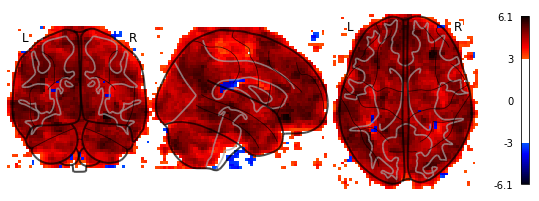

In [81]:
from nilearn import plotting
threshold = 3.1  # correponds to  p < .001, uncorrected
display = plotting.plot_glass_brain(
    z_map, threshold=threshold, colorbar=True, plot_abs=False)